Home work Question number 7
Find the count , mean , std deviation, min , max, 25 percentile, 50 percentile and 75 percentile of numeric features

In [1]:
import os
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import csv
import sklearn 
import graphviz
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import RFE
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.feature_selection import SelectKBest, chi2, f_classif
from io import StringIO
import sklearn.tree as tree
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
import sqlite3
import pandas as pd
import numpy as np
import seaborn as sns
import itertools
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import linear_model
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, accuracy_score
from sklearn.calibration import CalibratedClassifierCV
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.metrics import make_scorer
from time import time
from sklearn.decomposition import PCA, FastICA
from sklearn.pipeline import Pipeline
import warnings
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC


In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import csv
import sklearn 
import graphviz

In [3]:
titan=pd.read_csv('train.csv')
titantest=pd.read_csv('test.csv')
np.where(pd.isnull(titan))
np.where(pd.isnull(titantest))
titantest.describe()


,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [4]:
print(titan)
titan.isnull().sum()
titan.notnull().sum()




     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ... 

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

In [5]:
titan.head(10)
titantest.isnull().sum()
titan.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [6]:
titan.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
titan.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [8]:
titan.Survived.value_counts()



0    549
1    342
Name: Survived, dtype: int64

In [9]:
titan.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [10]:
cols=['Name','Sex','Ticket','Cabin','Embarked']

In [11]:
titan.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [12]:
titan.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [13]:
titan.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [14]:
titan.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [15]:
list(set(titan.Name))

['Skoog, Mr. Wilhelm',
 'Moran, Mr. Daniel J',
 'Wilhelms, Mr. Charles',
 'Thomas, Master. Assad Alexander',
 'Sage, Mr. Frederick',
 'Goodwin, Master. Sidney Leonard',
 'Sandstrom, Mrs. Hjalmar (Agnes Charlotta Bengtsson)',
 'Hedman, Mr. Oskar Arvid',
 'Louch, Mrs. Charles Alexander (Alice Adelaide Slow)',
 'Tomlin, Mr. Ernest Portage',
 'Hart, Mr. Benjamin',
 'Williams, Mr. Leslie',
 'Skoog, Mrs. William (Anna Bernhardina Karlsson)',
 'Bengtsson, Mr. John Viktor',
 'Carter, Master. William Thornton II',
 'Weisz, Mrs. Leopold (Mathilde Francoise Pede)',
 'de Pelsmaeker, Mr. Alfons',
 'Ridsdale, Miss. Lucy',
 'Strom, Mrs. Wilhelm (Elna Matilda Persson)',
 'Danoff, Mr. Yoto',
 'Goodwin, Mrs. Frederick (Augusta Tyler)',
 'Byles, Rev. Thomas Roussel Davids',
 'Pain, Dr. Alfred',
 'Baclini, Miss. Helene Barbara',
 'Gale, Mr. Shadrach',
 'Risien, Mr. Samuel Beard',
 'Carrau, Mr. Francisco M',
 'Nasser, Mr. Nicholas',
 'Rice, Master. George Hugh',
 'Parrish, Mrs. (Lutie Davis)',
 'Leyson, Mr

In [16]:
titan.Name.nunique()

891

In [17]:
list(set(titan.Sex))

['male', 'female']

In [18]:
titan.Ticket.nunique()

681

In [19]:
list(set(titan.Cabin))

[nan,
 'E44',
 'A32',
 'C148',
 'C62 C64',
 'E17',
 'B50',
 'C128',
 'D28',
 'A20',
 'C124',
 'A34',
 'C92',
 'C7',
 'B73',
 'C106',
 'D6',
 'E67',
 'F E69',
 'C47',
 'F2',
 'C32',
 'C86',
 'D26',
 'D19',
 'B69',
 'E12',
 'D17',
 'E49',
 'D47',
 'C82',
 'C87',
 'C23 C25 C27',
 'B38',
 'C118',
 'C126',
 'C46',
 'E121',
 'D11',
 'E38',
 'B4',
 'D20',
 'A14',
 'B49',
 'B79',
 'C65',
 'A19',
 'B5',
 'F G63',
 'B42',
 'B28',
 'D37',
 'B30',
 'E31',
 'D50',
 'D36',
 'A23',
 'C90',
 'E63',
 'E50',
 'C45',
 'B18',
 'E8',
 'C68',
 'B19',
 'E33',
 'E46',
 'E101',
 'D',
 'C70',
 'B41',
 'C85',
 'G6',
 'E24',
 'A36',
 'E34',
 'C125',
 'A5',
 'C78',
 'C83',
 'F G73',
 'B3',
 'D33',
 'B102',
 'D15',
 'C49',
 'B77',
 'T',
 'C30',
 'B96 B98',
 'D30',
 'B80',
 'D56',
 'A6',
 'D7',
 'B78',
 'C2',
 'A26',
 'E36',
 'F4',
 'A10',
 'B35',
 'C99',
 'A31',
 'D45',
 'C110',
 'D49',
 'B22',
 'B58 B60',
 'D9',
 'E25',
 'F33',
 'B39',
 'D10 D12',
 'B86',
 'E68',
 'C91',
 'C104',
 'C54',
 'B101',
 'B37',
 'C93',
 

In [20]:
titan.Cabin.nunique()

147

In [21]:
titan.Embarked.nunique()

3

In [22]:
titan.Embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [23]:
list(set(titan.Embarked))

['C', nan, 'S', 'Q']

In [24]:
titan.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [25]:
titan.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [26]:
titan.Cabin.value_counts()

C23 C25 C27    4
G6             4
B96 B98        4
E101           3
F33            3
              ..
C118           1
C46            1
D9             1
E40            1
B38            1
Name: Cabin, Length: 147, dtype: int64

In [27]:
titan.Ticket.value_counts()

347082      7
1601        7
CA. 2343    7
CA 2144     6
3101295     6
           ..
2677        1
3411        1
36864       1
36963       1
364498      1
Name: Ticket, Length: 681, dtype: int64

In [28]:
titan.Ticket.mode()

0        1601
1      347082
2    CA. 2343
dtype: object

In [29]:
titan.Cabin.mode()

0        B96 B98
1    C23 C25 C27
2             G6
dtype: object

In [30]:
titan.Embarked.mode()

0    S
dtype: object

In [31]:
titan.Pclass.value_counts()


3    491
1    216
2    184
Name: Pclass, dtype: int64

In [32]:
titan.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [33]:
titan.Sex.count()

891

In [34]:
titan.Embarked.count()

889

In [35]:
titan.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [36]:
titan.Survived.count()

891

In [37]:
titan.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [38]:
titan.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [39]:
titan1=titan[titan.Pclass==1]
titan2=titan[titan.Pclass==2]
titan3=titan[titan.Pclass==3]


In [40]:
print(titan1)

     PassengerId  Survived  Pclass  \
1              2         1       1   
3              4         1       1   
6              7         0       1   
11            12         1       1   
23            24         1       1   
..           ...       ...     ...   
871          872         1       1   
872          873         0       1   
879          880         1       1   
887          888         1       1   
889          890         1       1   

                                                  Name     Sex   Age  SibSp  \
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
6                              McCarthy, Mr. Timothy J    male  54.0      0   
11                            Bonnell, Miss. Elizabeth  female  58.0      0   
23                        Sloper, Mr. William Thompson    male  28.0      0   
..                                                 ...     ...   ... 

In [41]:
titan1.corr(method='pearson')

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,0.159824,NaN,-0.003969,-0.055167,-0.026157,-0.026348
Survived,0.159824,1.000000,NaN,-0.267964,0.162276,0.062565,0.190966
Pclass,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,-0.003969,-0.267964,NaN,1.000000,-0.121015,-0.243613,-0.218611
SibSp,-0.055167,0.162276,NaN,-0.121015,1.000000,0.261954,0.259492
Parch,-0.026157,0.062565,NaN,-0.243613,0.261954,1.000000,0.380963
Fare,-0.026348,0.190966,NaN,-0.218611,0.259492,0.380963,1.000000


In [42]:
print(titan1)

     PassengerId  Survived  Pclass  \
1              2         1       1   
3              4         1       1   
6              7         0       1   
11            12         1       1   
23            24         1       1   
..           ...       ...     ...   
871          872         1       1   
872          873         0       1   
879          880         1       1   
887          888         1       1   
889          890         1       1   

                                                  Name     Sex   Age  SibSp  \
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
6                              McCarthy, Mr. Timothy J    male  54.0      0   
11                            Bonnell, Miss. Elizabeth  female  58.0      0   
23                        Sloper, Mr. William Thompson    male  28.0      0   
..                                                 ...     ...   ... 

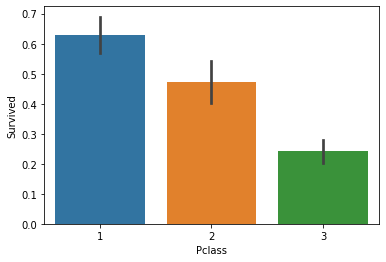

In [43]:
sns.barplot(x='Pclass', y='Survived', data=titan)

In [44]:
titan1.Survived.value_counts()

1    136
0     80
Name: Survived, dtype: int64

In [45]:
p1surv=(136/(136+80))
print(p1surv)

0.6296296296296297


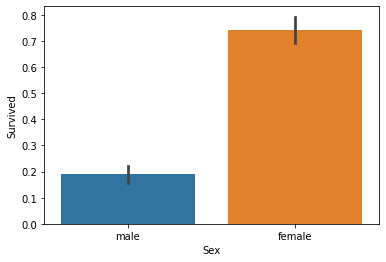

In [46]:
sns.barplot(x='Sex', y='Survived', data=titan)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000022E41B34388>,
      dtype=object)

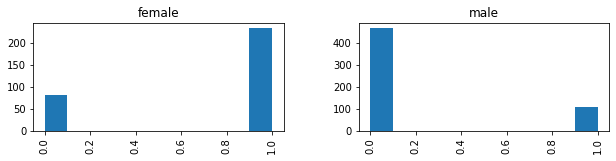

In [47]:
titan.hist("Survived", by="Sex",figsize = [10,2])

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000022E41C9A4C8>,
      dtype=object)

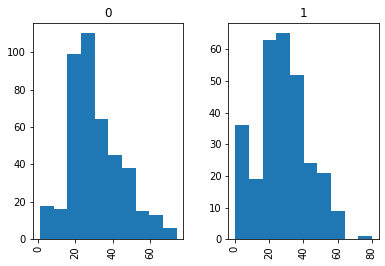

In [48]:
titan.hist("Age",by = ["Survived"])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000022E41DA0A08>,
      dtype=object)

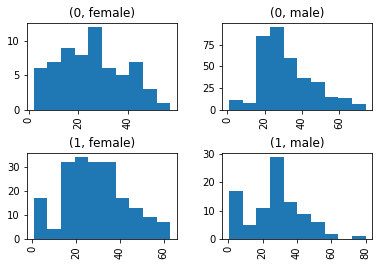

In [49]:
titan.hist("Age",by = ["Survived","Sex"])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000022E41F63C48>,
      dtype=object)

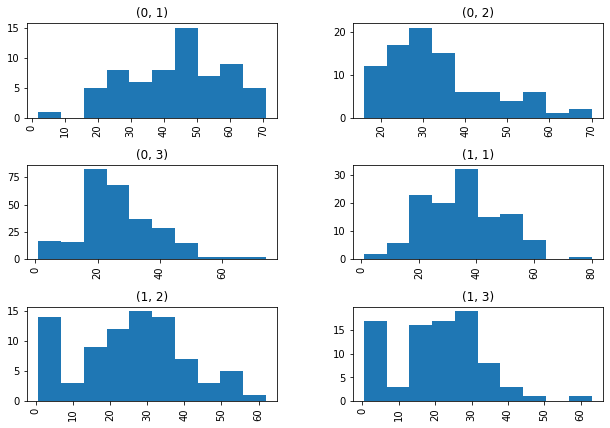

In [50]:
titan.hist("Age",by = ["Survived","Pclass"],figsize = [10,7])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000022E42322608>,
      dtype=object)

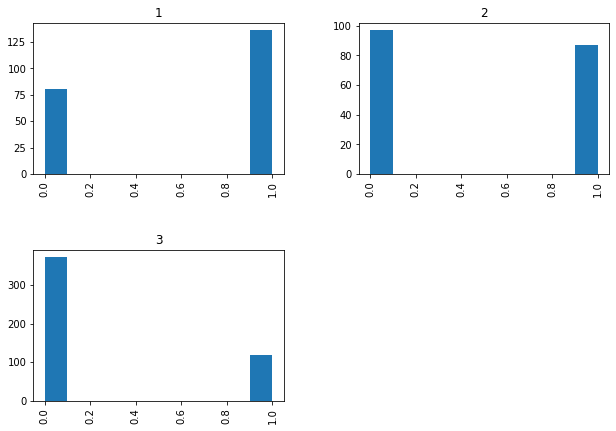

In [51]:
titan.hist("Survived",by = ["Pclass"],figsize = [10,7])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000022E422DAE88>,
      dtype=object)

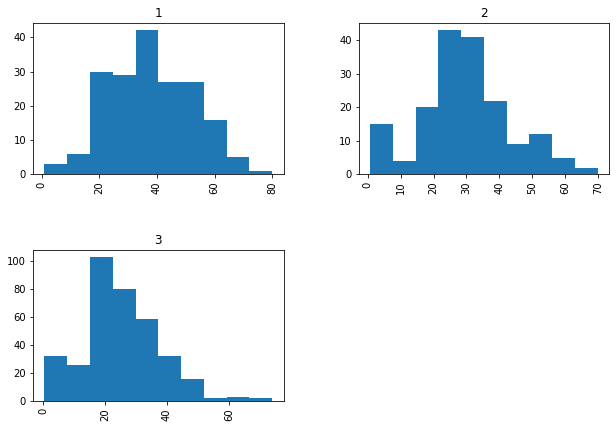

In [52]:
titan.hist("Age",by = ["Pclass"],figsize = [10,7])

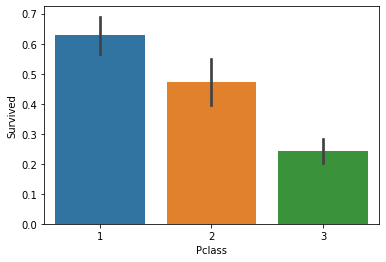

In [53]:
sns.barplot(x='Pclass', y='Survived', data=titan)

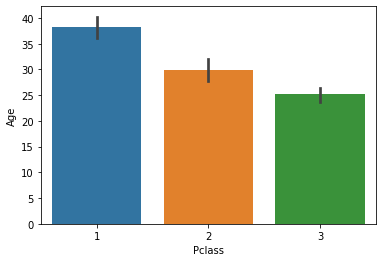

In [54]:
sns.barplot(x='Pclass', y='Age', data=titan)

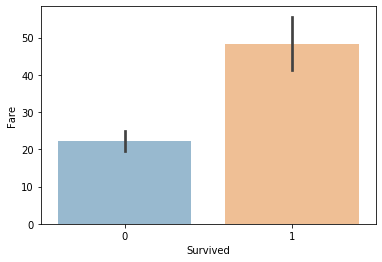

In [55]:
sns.barplot(x='Survived', y='Fare', data=titan,alpha=0.5)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000022E4275EB48>,
      dtype=object)

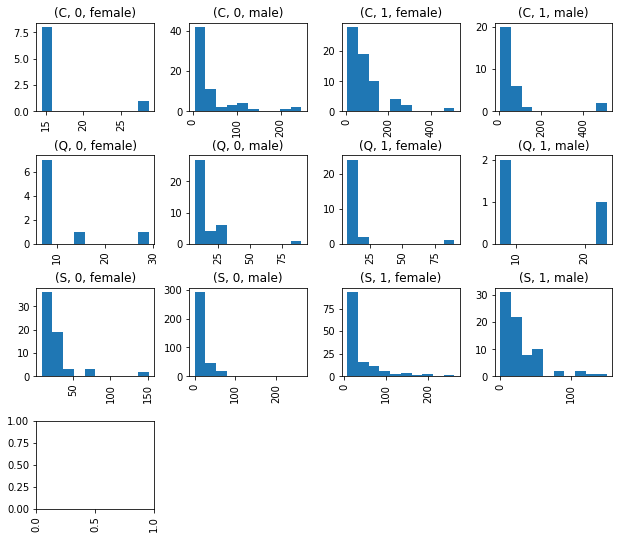

In [56]:
titan.hist("Fare",by = ["Embarked","Survived","Sex"],figsize = [10,9])

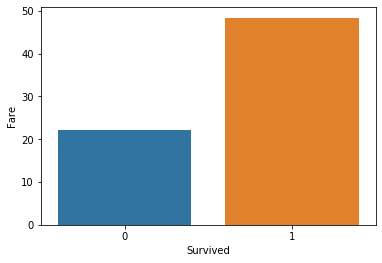

In [57]:
sns.barplot(x='Survived', y='Fare', data=titan,ci=None)

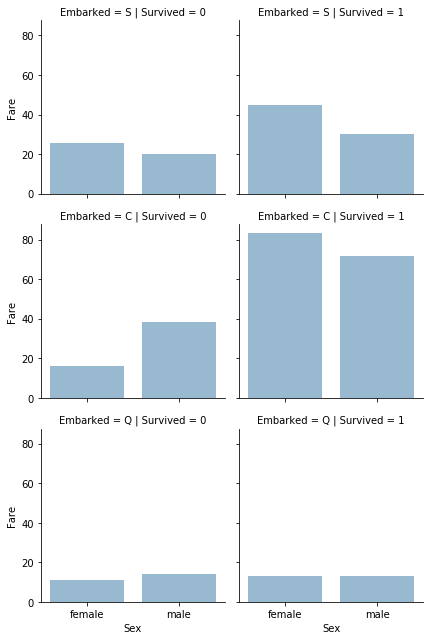

In [58]:
graph = sns.FacetGrid(titan, row='Embarked', col='Survived')
graph.map(sns.barplot, 'Sex', 'Fare', alpha=.5,ci=None,order=['female','male'])
graph.add_legend()

In [59]:
titan.Ticket.count()

891

In [60]:
titan.Ticket.nunique()

681

In [61]:
titan=titan.drop(['Ticket'],axis=1)
titantest=titantest.drop(['Ticket'],axis=1)

In [62]:
titan.shape

(891, 11)

In [63]:
titan.Cabin.isnull().sum()

687

In [64]:
titan=titan.drop(['Cabin'],axis=1)
titantest=titantest.drop(['Cabin'],axis=1)

In [65]:
titan.shape

(891, 10)

In [66]:
titan.Sex =   titan.Sex.map( {'male': 1, 'female': 0})

In [67]:
titan.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,71.2833,C


In [68]:
titan.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [69]:
titan.Embarked.count()

889

In [70]:
titan.Embarked.fillna("S") 

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 891, dtype: object

In [71]:
titan.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [72]:
titan.Embarked.count()

889

In [73]:
titan.Fare.mode()

0    8.05
dtype: float64

In [74]:
titan.Fare.fillna(8.05) 

0       7.2500
1      71.2833
2       7.9250
3      53.1000
4       8.0500
        ...   
886    13.0000
887    30.0000
888    23.4500
889    30.0000
890     7.7500
Name: Fare, Length: 891, dtype: float64

In [75]:
titan.Fare

0       7.2500
1      71.2833
2       7.9250
3      53.1000
4       8.0500
        ...   
886    13.0000
887    30.0000
888    23.4500
889    30.0000
890     7.7500
Name: Fare, Length: 891, dtype: float64

In [76]:
from sklearn.impute import KNNImputer

In [77]:
def convert_num(x):
    if x >= -(0.0001) and x <= 7.91:
        return 0
    elif x > 7.91 and x <= 14.454:
        return 1
    elif x > 14.454 and x <= 31.0:
        return 2
    elif x > 14.454 and x <= 512.329:
        return 3

In [78]:
titan.Fare.apply(convert_num)

0      0.0
1      3.0
2      1.0
3      3.0
4      1.0
      ... 
886    1.0
887    2.0
888    2.0
889    2.0
890    0.0
Name: Fare, Length: 891, dtype: float64

In [79]:
titan.Fare.isnull().sum()

0

In [80]:
yi=titan.Age.values
yi=yi.reshape(-1,1)
imputer = KNNImputer(n_neighbors=5)
ynew=imputer.fit_transform(yi)


In [81]:
titan.head(5)
ynew

array([[22.        ],
       [38.        ],
       [26.        ],
       [35.        ],
       [35.        ],
       [29.69911765],
       [54.        ],
       [ 2.        ],
       [27.        ],
       [14.        ],
       [ 4.        ],
       [58.        ],
       [20.        ],
       [39.        ],
       [14.        ],
       [55.        ],
       [ 2.        ],
       [29.69911765],
       [31.        ],
       [29.69911765],
       [35.        ],
       [34.        ],
       [15.        ],
       [28.        ],
       [ 8.        ],
       [38.        ],
       [29.69911765],
       [19.        ],
       [29.69911765],
       [29.69911765],
       [40.        ],
       [29.69911765],
       [29.69911765],
       [66.        ],
       [28.        ],
       [42.        ],
       [29.69911765],
       [21.        ],
       [18.        ],
       [14.        ],
       [40.        ],
       [27.        ],
       [29.69911765],
       [ 3.        ],
       [19.        ],
       [29

In [82]:
pd.DataFrame(ynew).shape
for i, x in enumerate(yi):
    print( str(yi[i][0]) + " : "+ str(ynew[i][0]))

22.0 : 22.0
38.0 : 38.0
26.0 : 26.0
35.0 : 35.0
35.0 : 35.0
nan : 29.69911764705882
54.0 : 54.0
2.0 : 2.0
27.0 : 27.0
14.0 : 14.0
4.0 : 4.0
58.0 : 58.0
20.0 : 20.0
39.0 : 39.0
14.0 : 14.0
55.0 : 55.0
2.0 : 2.0
nan : 29.69911764705882
31.0 : 31.0
nan : 29.69911764705882
35.0 : 35.0
34.0 : 34.0
15.0 : 15.0
28.0 : 28.0
8.0 : 8.0
38.0 : 38.0
nan : 29.69911764705882
19.0 : 19.0
nan : 29.69911764705882
nan : 29.69911764705882
40.0 : 40.0
nan : 29.69911764705882
nan : 29.69911764705882
66.0 : 66.0
28.0 : 28.0
42.0 : 42.0
nan : 29.69911764705882
21.0 : 21.0
18.0 : 18.0
14.0 : 14.0
40.0 : 40.0
27.0 : 27.0
nan : 29.69911764705882
3.0 : 3.0
19.0 : 19.0
nan : 29.69911764705882
nan : 29.69911764705882
nan : 29.69911764705882
nan : 29.69911764705882
18.0 : 18.0
7.0 : 7.0
21.0 : 21.0
49.0 : 49.0
29.0 : 29.0
65.0 : 65.0
nan : 29.69911764705882
21.0 : 21.0
28.5 : 28.5
5.0 : 5.0
11.0 : 11.0
22.0 : 22.0
38.0 : 38.0
45.0 : 45.0
4.0 : 4.0
nan : 29.69911764705882
nan : 29.69911764705882
29.0 : 29.0
19.0 : 1

In [83]:
titan.shape

(891, 10)

In [84]:
titan= pd.concat([pd.DataFrame(ynew),titan],axis=1)

In [85]:
titan=titan.drop(['Age'],axis=1)

In [86]:
titan.rename(columns={0:'Age'},inplace=True)

In [87]:
np.sum(titan.Age == np.nan)

0

In [88]:
titan.Age

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    29.699118
889    26.000000
890    32.000000
Name: Age, Length: 891, dtype: float64

In [89]:
titan.head(2)

,Age,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Fare,Embarked
0,22.0,1,0,3,"Braund, Mr. Owen Harris",1,1,0,7.2500,S
1,38.0,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,0,71.2833,C


In [90]:
titan.Age

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    29.699118
889    26.000000
890    32.000000
Name: Age, Length: 891, dtype: float64

In [91]:
titan.head(2)

,Age,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Fare,Embarked
0,22.0,1,0,3,"Braund, Mr. Owen Harris",1,1,0,7.2500,S
1,38.0,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,0,71.2833,C


In [92]:
titan.Fare.apply(convert_num)

0      0.0
1      3.0
2      1.0
3      3.0
4      1.0
      ... 
886    1.0
887    2.0
888    2.0
889    2.0
890    0.0
Name: Fare, Length: 891, dtype: float64

In [93]:
titan.head(2)

,Age,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Fare,Embarked
0,22.0,1,0,3,"Braund, Mr. Owen Harris",1,1,0,7.2500,S
1,38.0,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,0,71.2833,C


In [94]:
titan.Fare


0       7.2500
1      71.2833
2       7.9250
3      53.1000
4       8.0500
        ...   
886    13.0000
887    30.0000
888    23.4500
889    30.0000
890     7.7500
Name: Fare, Length: 891, dtype: float64

In [95]:
titan.Fare=titan.Fare.apply(convert_num)

In [96]:
titan.Fare

0      0.0
1      3.0
2      1.0
3      3.0
4      1.0
      ... 
886    1.0
887    2.0
888    2.0
889    2.0
890    0.0
Name: Fare, Length: 891, dtype: float64

In [97]:
titan.head()

,Age,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Fare,Embarked
0,22.0,1,0,3,"Braund, Mr. Owen Harris",1,1,0,0.0,S
1,38.0,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,0,3.0,C
2,26.0,3,1,3,"Heikkinen, Miss. Laina",0,0,0,1.0,S
3,35.0,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,0,3.0,S
4,35.0,5,0,3,"Allen, Mr. William Henry",1,0,0,1.0,S


In [98]:
titan.shape

(891, 10)

In [99]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import RFE
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.feature_selection import SelectKBest, chi2, f_classif
from io import StringIO
import sklearn.tree as tree


from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

In [100]:
titantest.head(2)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,S


In [101]:
titantest.Fare=titantest.Fare.apply(convert_num)

In [102]:
titantest.Fare

0      0.0
1      0.0
2      1.0
3      1.0
4      1.0
      ... 
413    1.0
414    3.0
415    0.0
416    1.0
417    2.0
Name: Fare, Length: 418, dtype: float64

In [103]:
titan

,Age,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Fare,Embarked
0,22.000000,1,0,3,"Braund, Mr. Owen Harris",1,1,0,0.0,S
1,38.000000,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,0,3.0,C
2,26.000000,3,1,3,"Heikkinen, Miss. Laina",0,0,0,1.0,S
3,35.000000,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,0,3.0,S
4,35.000000,5,0,3,"Allen, Mr. William Henry",1,0,0,1.0,S
...,...,...,...,...,...,...,...,...,...,...
886,27.000000,887,0,2,"Montvila, Rev. Juozas",1,0,0,1.0,S
887,19.000000,888,1,1,"Graham, Miss. Margaret Edith",0,0,0,2.0,S
888,29.699118,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,1,2,2.0,S
889,26.000000,890,1,1,"Behr, Mr. Karl Howell",1,0,0,2.0,C


In [104]:
titantest

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,0.0,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,0.0,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,1.0,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,1.0,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,1.0,S
...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,1.0,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,3.0,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,0.0,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,1.0,S


In [105]:
titan = titan.drop(['Name','Embarked'], axis=1)

In [106]:
titan

,Age,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Fare
0,22.000000,1,0,3,1,1,0,0.0
1,38.000000,2,1,1,0,1,0,3.0
2,26.000000,3,1,3,0,0,0,1.0
3,35.000000,4,1,1,0,1,0,3.0
4,35.000000,5,0,3,1,0,0,1.0
...,...,...,...,...,...,...,...,...
886,27.000000,887,0,2,1,0,0,1.0
887,19.000000,888,1,1,0,0,0,2.0
888,29.699118,889,0,3,0,1,2,2.0
889,26.000000,890,1,1,1,0,0,2.0


In [107]:
y= titan["Survived"]

In [108]:
titan = titan.drop(["Survived"], axis=1)

In [109]:
x = titan

In [110]:
x

,Age,PassengerId,Pclass,Sex,SibSp,Parch,Fare
0,22.000000,1,3,1,1,0,0.0
1,38.000000,2,1,0,1,0,3.0
2,26.000000,3,3,0,0,0,1.0
3,35.000000,4,1,0,1,0,3.0
4,35.000000,5,3,1,0,0,1.0
...,...,...,...,...,...,...,...
886,27.000000,887,2,1,0,0,1.0
887,19.000000,888,1,0,0,0,2.0
888,29.699118,889,3,0,1,2,2.0
889,26.000000,890,1,1,0,0,2.0


In [111]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [112]:
titan.isnull().sum()

Age            0
PassengerId    0
Pclass         0
Sex            0
SibSp          0
Parch          0
Fare           3
dtype: int64

In [113]:
titantest.Fare

0      0.0
1      0.0
2      1.0
3      1.0
4      1.0
      ... 
413    1.0
414    3.0
415    0.0
416    1.0
417    2.0
Name: Fare, Length: 418, dtype: float64

In [114]:
titan['Fare'] = titan['Fare'].fillna(1)

In [115]:
titan.isnull().sum()

Age            0
PassengerId    0
Pclass         0
Sex            0
SibSp          0
Parch          0
Fare           0
dtype: int64

In [116]:
ex = ExtraTreesClassifier()
ex.fit(x, y)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

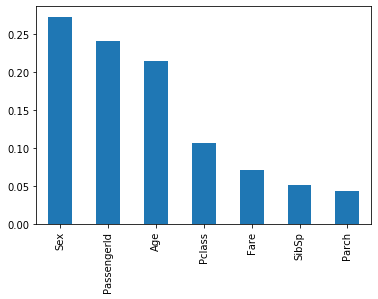

In [117]:
feat_importances = pd.Series(ex.feature_importances_, index=x.columns)
feat_importances.nlargest(7).plot(kind='bar')
plt.show()

In [118]:

titan.head(2)


,Age,PassengerId,Pclass,Sex,SibSp,Parch,Fare
0,22.0,1,3,1,1,0,0.0
1,38.0,2,1,0,1,0,3.0


In [119]:
titan = titan.drop(['Fare','Parch', 'SibSp'], axis=1)

In [120]:
x=titan

In [121]:
x

,Age,PassengerId,Pclass,Sex
0,22.000000,1,3,1
1,38.000000,2,1,0
2,26.000000,3,3,0
3,35.000000,4,1,0
4,35.000000,5,3,1
...,...,...,...,...
886,27.000000,887,2,1
887,19.000000,888,1,0
888,29.699118,889,3,0
889,26.000000,890,1,1


In [122]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [123]:
dtree = DecisionTreeClassifier(criterion='gini',random_state=1, max_depth=3)
dtree.fit(x, y)
dtree.score(x, y)

0.8114478114478114

In [124]:
np.mean(cross_val_score(dtree,x,y,cv=5,scoring='precision'))

0.7125629127874593

In [125]:
rforest = RandomForestClassifier(n_estimators=100, max_depth=3)
rforest.fit(x, y)
rforest.score(x, y)

0.8305274971941639

In [126]:
np.mean(cross_val_score(rforest,x,y,cv=5))

0.773435440336451

In [127]:
import os
#os.environ["PATH"] += os.pathsep + 'C:/Users/kurie/anaconda3/Lib/site-packages/graphviz'

#feature_names = x.columns
#dot_data = tree.export_graphviz(dtree, out_file=None, filled=True, rounded=True,
 #feature_names=feature_names,
 #class_names=["Not Survived","Survived"])
#graph = graphviz.Source(dot_data)
#graph.render('./table.gv', view=True) 

In [128]:

model = GaussianNB()
model.fit(x, y)



GaussianNB(priors=None, var_smoothing=1e-09)

In [129]:
y_pred1 = model.predict(x)

In [130]:
y_pred1

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1,

In [131]:
accuracy_score(y, y_pred1)

0.7867564534231201

In [132]:
recall_score(y, y_pred1)

0.6900584795321637

In [133]:
precision_score(y, y_pred1)

0.7375

In [134]:
f1_score(y, y_pred1)

0.7129909365558913

In [135]:
np.mean(cross_val_score(model,x,y,cv=5,scoring='accuracy'))

0.7845019145063086

In [136]:
np.mean(cross_val_score(model,x,y,cv=5,scoring='recall'))

0.6899829497016198

In [137]:
np.mean(cross_val_score(model,x,y,cv=5,scoring='precision'))

0.733013450892432

In [138]:
np.mean(cross_val_score(model,x,y,cv=5,scoring='f1'))

0.7098473551820123

In [139]:
clf1 = svm.SVC(kernel='linear')

In [140]:
clf1.fit(x,y)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [141]:
y_pred10 = clf1.predict(x)

In [142]:
accuracy_score(y, y_pred10)

0.7856341189674523

In [143]:
np.mean(cross_val_score(clf1,x,y,cv=5,scoring='accuracy'))

0.7867365513778168

In [144]:
clf2 = svm.SVC(kernel='rbf')

In [145]:
clf2.fit(x,y)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [146]:
y_pred11 = clf2.predict(x)

In [147]:
accuracy_score(y, y_pred11)

0.6161616161616161

In [148]:
np.mean(cross_val_score(clf2,x,y,cv=5,scoring='accuracy'))

0.6161634548992531

In [149]:
clf3 = svm.SVC(kernel='poly',degree=2)

In [150]:
clf3.fit(x,y)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=2, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [151]:
y_pred12 = clf3.predict(x)

In [152]:
accuracy_score(y, y_pred12)

0.6161616161616161

In [153]:
np.mean(cross_val_score(clf3,x,y,cv=5,scoring='accuracy'))

0.6161634548992531